In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


In [2]:
bias = 1

X = [
    [1,1,1],
    [1,0,1],
    [0,1,1],
    [0,0,0]
]

w = [
    random.random(),
    random.random(),
    random.random()
]

In [3]:
w

[0.5192903897225699, 0.11897479622730778, 0.8749924997330973]

In [4]:
def af(num):
    if num > 0:
        return 1
    else:
        return 0

In [5]:
def noron(i):
    x0 = i[0]
    x1 = i[1]
    y = i[2]
    z = (x0 * w[0]) + (x1 * w[1]) + (bias * w[2])
    output = af(z)
    error = y - output
    return error, output

In [6]:
epochs = 100

for i in range(epochs):
    print(f'epoch: {i}')
    for j in X:
        error, output = noron(j)
        w[0] = w[0] + error * j[0]
        w[1] = w[1] + error * j[1]
        w[2] = w[2] + error * bias
        print(error)
        
w
            

epoch: 0
0
0
0
-1
epoch: 1
0
0
1
-1
epoch: 2
0
0
0
0
epoch: 3
0
0
0
0
epoch: 4
0
0
0
0
epoch: 5
0
0
0
0
epoch: 6
0
0
0
0
epoch: 7
0
0
0
0
epoch: 8
0
0
0
0
epoch: 9
0
0
0
0
epoch: 10
0
0
0
0
epoch: 11
0
0
0
0
epoch: 12
0
0
0
0
epoch: 13
0
0
0
0
epoch: 14
0
0
0
0
epoch: 15
0
0
0
0
epoch: 16
0
0
0
0
epoch: 17
0
0
0
0
epoch: 18
0
0
0
0
epoch: 19
0
0
0
0
epoch: 20
0
0
0
0
epoch: 21
0
0
0
0
epoch: 22
0
0
0
0
epoch: 23
0
0
0
0
epoch: 24
0
0
0
0
epoch: 25
0
0
0
0
epoch: 26
0
0
0
0
epoch: 27
0
0
0
0
epoch: 28
0
0
0
0
epoch: 29
0
0
0
0
epoch: 30
0
0
0
0
epoch: 31
0
0
0
0
epoch: 32
0
0
0
0
epoch: 33
0
0
0
0
epoch: 34
0
0
0
0
epoch: 35
0
0
0
0
epoch: 36
0
0
0
0
epoch: 37
0
0
0
0
epoch: 38
0
0
0
0
epoch: 39
0
0
0
0
epoch: 40
0
0
0
0
epoch: 41
0
0
0
0
epoch: 42
0
0
0
0
epoch: 43
0
0
0
0
epoch: 44
0
0
0
0
epoch: 45
0
0
0
0
epoch: 46
0
0
0
0
epoch: 47
0
0
0
0
epoch: 48
0
0
0
0
epoch: 49
0
0
0
0
epoch: 50
0
0
0
0
epoch: 51
0
0
0
0
epoch: 52
0
0
0
0
epoch: 53
0
0
0
0
epoch: 54
0
0
0
0
epoch: 55
0
0
0
0


[0.5192903897225699, 1.1189747962273078, -0.12500750026690266]

In [7]:
x_new = [0.1,0]
af((x_new[0] * w[0]) + (x_new[1] * w[1]) + (bias * w[2]))

0

In [8]:
import tensorflow as tf

In [9]:
print("TF version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TF version: 2.18.1
Keras version: 3.11.2


In [10]:
df = pd.read_csv('cardio/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
X_title = df.loc[:-1]
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

In [14]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [16]:
np.shape(X)

(70000, 11)

In [17]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [18]:
Y = pd.get_dummies(Y)
Y

,0,1
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
69995,True,False
69996,False,True
69997,False,True
69998,False,True


In [19]:
from sklearn.model_selection import train_test_split
x_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=33123)

In [20]:
deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
deep_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [22]:
deep_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 554 (2.16 KB)

 Trainable params: 554 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

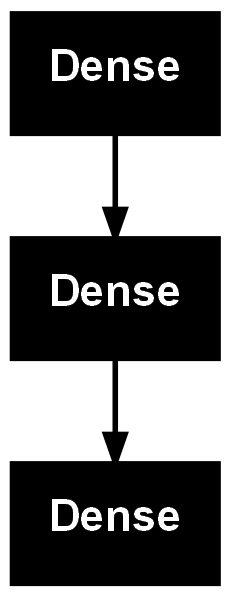

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(deep_model)

In [24]:
deep_model.fit(x_train, Y_train, epochs=20, validation_data=(X_test,Y_test), batch_size=100)

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.5908 - loss: 0.6616 - val_categorical_accuracy: 0.6175 - val_loss: 0.6477
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6367 - loss: 0.6377 - val_categorical_accuracy: 0.6319 - val_loss: 0.6369
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6416 - loss: 0.6316 - val_categorical_accuracy: 0.6390 - val_loss: 0.6314
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6456 - loss: 0.6287 - val_categorical_accuracy: 0.6369 - val_loss: 0.6311
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.6457 - loss: 0.6276 - val_categorical_accuracy: 0.6441 - val_loss: 0.6282
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6481 - loss: 0.6267 - val_categorical_accuracy: 0.6444 - val_loss: 0.6299
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.6485 - los

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, Y_train)
y_pred = rfc.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6894
           1       0.73      0.71      0.72      7106

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000
 samples avg       0.72      0.72      0.72     14000



c:\Users\sinah\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
deep_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

deep_model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

deep_model2.summary()

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,929 (15.35 KB)

 Trainable params: 3,929 (15.35 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
deep_model2.fit(x_train, Y_train, epochs=20, validation_data=(X_test,Y_test), batch_size=100)

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.6226 - loss: 0.6459 - val_categorical_accuracy: 0.6310 - val_loss: 0.6367
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.6428 - loss: 0.6334 - val_categorical_accuracy: 0.6416 - val_loss: 0.6314
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.6440 - loss: 0.6301 - val_categorical_accuracy: 0.6429 - val_loss: 0.6287
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.6458 - loss: 0.6289 - val_categorical_accuracy: 0.6434 - val_loss: 0.6275
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6458 - loss: 0.6281 - val_categorical_accuracy: 0.6471 - val_loss: 0.6272
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.6478 - loss: 0.6265 - val_categorical_accuracy: 0.6479 - val_loss: 0.6264
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.6495 - los

In [28]:
deep_model2.predict(X_test)[3]

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.64684945, 0.35315046], dtype=float32)

In [29]:
np.argmax(deep_model2.predict(X_test)[3])

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0

In [30]:
y_pred_deep = np.argmax(deep_model2.predict(X_test),axis=1)
print(classification_report(Y_test, y_pred_deep))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [39]:
from tensorflow.keras.datasets import mnist

In [38]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
